# This is my honors research project on the Influence of extreme climatic conditions on insurance companies stock prices

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [38]:
insurance_df = pd.read_csv('data/insurance.csv')
tornado_df1= pd.read_csv('data/us_tornado_dataset_1950_2021.csv')
tornado_df2 = pd.read_csv('data/tornados.csv')

In [39]:
print("Tornado Dataset 1")
print(tornado_df1.head())

Tornado Dataset 1
     yr  mo  dy        date  st  mag  inj  fat   slat   slon   elat   elon  \
0  1950   1   3  1950-01-03  IL    3    3    0  39.10 -89.30  39.12 -89.23   
1  1950   1   3  1950-01-03  MO    3    3    0  38.77 -90.22  38.83 -90.03   
2  1950   1   3  1950-01-03  OH    1    1    0  40.88 -84.58   0.00   0.00   
3  1950   1  13  1950-01-13  AR    3    1    1  34.40 -94.37   0.00   0.00   
4  1950   1  25  1950-01-25  IL    2    0    0  41.17 -87.33   0.00   0.00   

   len  wid  
0  3.6  130  
1  9.5  150  
2  0.1   10  
3  0.6   17  
4  0.1  100  


In [40]:
print("\nTornado Dataset 2")
print(tornado_df2.head())


Tornado Dataset 2
    om    yr  mo  dy        date      time               tz  \
0  192  1950  10   1  1950-10-01  21:00:00  America/Chicago   
1  193  1950  10   9  1950-10-09  02:15:00  America/Chicago   
2  195  1950  11  20  1950-11-20  02:20:00  America/Chicago   
3  196  1950  11  20  1950-11-20  04:00:00  America/Chicago   
4  197  1950  11  20  1950-11-20  07:30:00  America/Chicago   

           datetime_utc  st  stf  ...   elon   len  wid  ns  sn   f1  f2  f3  \
0  1950-10-02T03:00:00Z  OK   40  ... -102.3  15.8   10   1   1   25   0   0   
1  1950-10-09T08:15:00Z  NC   37  ...    0.0   2.0  880   1   1   47   0   0   
2  1950-11-20T08:20:00Z  KY   21  ...    0.0   0.1   10   1   1  177   0   0   
3  1950-11-20T10:00:00Z  KY   21  ...    0.0   0.1   10   1   1  209   0   0   
4  1950-11-20T13:30:00Z  MS   28  ...    0.0   2.0   37   1   1  101   0   0   

   f4     fc  
0   0  False  
1   0  False  
2   0  False  
3   0  False  
4   0  False  

[5 rows x 27 columns]


In [41]:
print("\nInsurance ETF Dataset")
print(insurance_df.head())


Insurance ETF Dataset
   Unnamed: 0 Ticker        Date       Open       High        Low  Close  \
0           0    IAK  2006-05-05  50.099998  50.250000  50.099998  50.25   
1           1    IAK  2006-05-06  50.099998  50.250000  50.099998  50.25   
2           2    IAK  2006-05-07  50.099998  50.250000  50.099998  50.25   
3           3    IAK  2006-05-08  50.299999  50.349998  50.230000  50.23   
4           4    IAK  2006-05-09  50.209999  50.310001  50.200001  50.25   

   Adj Close  Volume company_name  
0  36.464928     600          IAK  
1  36.464928     600          IAK  
2  36.464928     600          IAK  
3  36.450413    1800          IAK  
4  36.464928     800          IAK  


In [42]:
print(tornado_df1.columns)

Index(['yr', 'mo', 'dy', 'date', 'st', 'mag', 'inj', 'fat', 'slat', 'slon',
       'elat', 'elon', 'len', 'wid'],
      dtype='object')


In [43]:
insurance_df['Date'] = pd.to_datetime(insurance_df['Date'])
tornado_df1['date'] = pd.to_datetime(tornado_df1['date'], errors='coerce')
tornado_df2['date'] = pd.to_datetime(tornado_df2['date'], errors='coerce')

In [44]:
insurance_df = insurance_df.sort_values(by='Date')
tornado_df1 = tornado_df1.sort_values(by='date')
tornado_df2 = tornado_df2.sort_values(by='date')

Visualize the number of tornadoes over time (using Tornado Dataset 1)

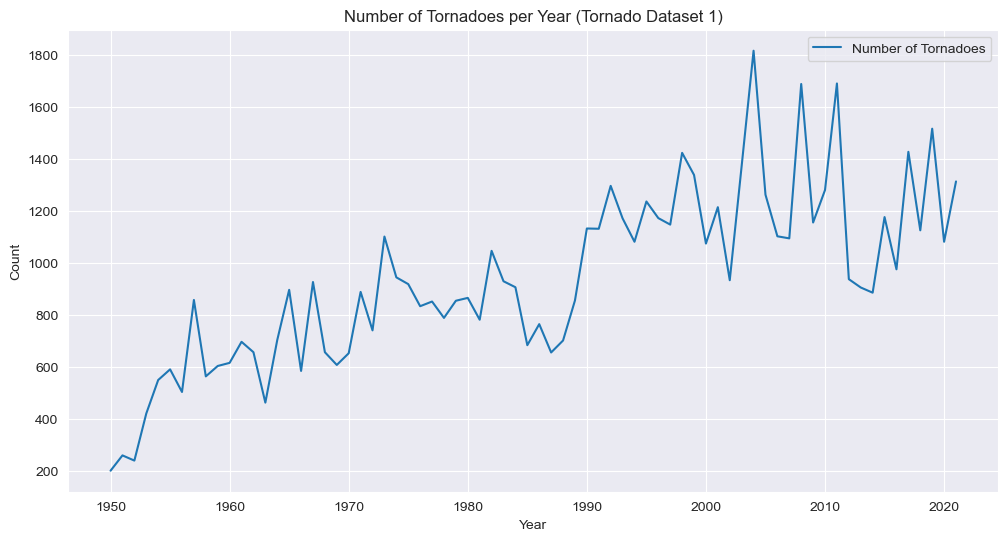

In [45]:
tornado_count = tornado_df1.groupby('yr').size()
plt.figure(figsize=(12, 6))
plt.plot(tornado_count.index, tornado_count.values, label='Number of Tornadoes')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Tornadoes per Year (Tornado Dataset 1)')
plt.legend()
plt.show()

Visualize the IAK ETF closing prices over time



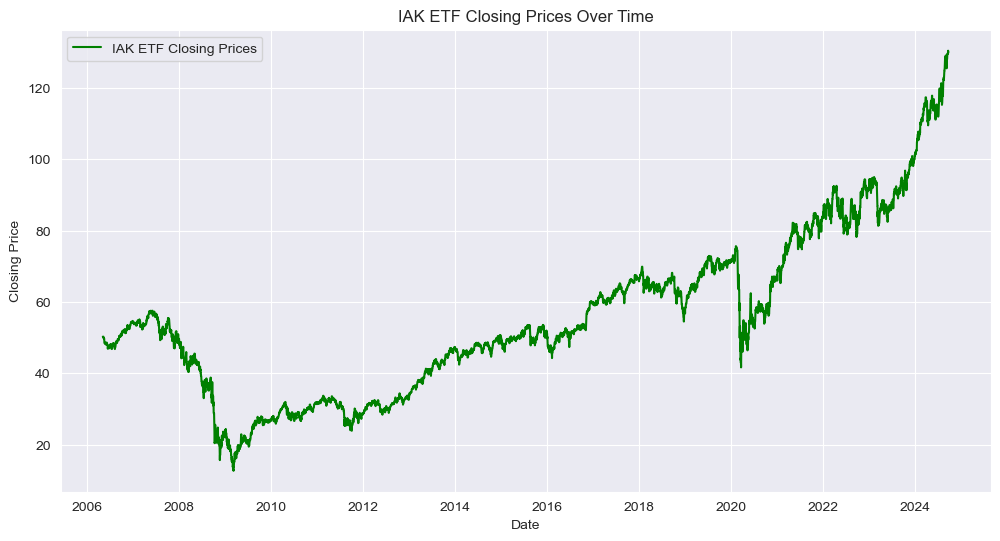

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(insurance_df['Date'], insurance_df['Close'], label='IAK ETF Closing Prices', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('IAK ETF Closing Prices Over Time')
plt.legend()
plt.show()

Calculate monthly averages for tornado occurrences and IAK ETF closing prices


In [47]:
insurance_df['YearMonth'] = insurance_df['Date'].dt.to_period('M')
tornado_df1['YearMonth'] = tornado_df1['date'].dt.to_period('M')
monthly_tornadoes = tornado_df1.groupby('YearMonth').size()
monthly_iak = insurance_df.groupby('YearMonth')['Close'].mean()

In [48]:
monthly_data = pd.DataFrame({'Tornadoes': monthly_tornadoes, 'IAK_Close': monthly_iak})
monthly_data = monthly_data.dropna()

Correlation between tornado occurrences and IAK ETF prices


In [49]:
correlation = monthly_data.corr().loc['Tornadoes', 'IAK_Close']
print(f"Correlation between Tornadoes and IAK ETF Closing Prices: {correlation:.2f}")

Correlation between Tornadoes and IAK ETF Closing Prices: 0.02


0.02 is considered positive yet weak correlation. That indicates, there is very weak positive relationship between the tornado occurances and the closing prices of the IAK ETF (Insurance ETF)

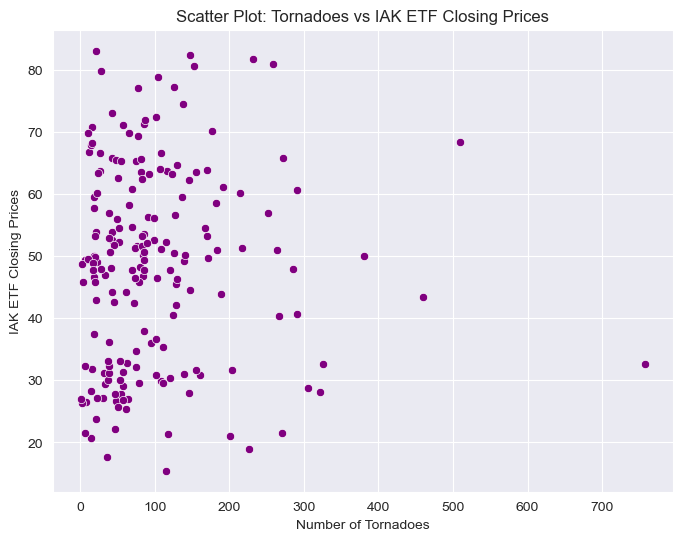

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=monthly_data['Tornadoes'], y=monthly_data['IAK_Close'], color='purple')
plt.xlabel('Number of Tornadoes')
plt.ylabel('IAK ETF Closing Prices')
plt.title('Scatter Plot: Tornadoes vs IAK ETF Closing Prices')
plt.show()

In [51]:
insurance_df.head(3)

,Unnamed: 0,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,company_name,YearMonth
0,0,IAK,2006-05-05,50.099998,50.25,50.099998,50.25,36.464928,600,IAK,2006-05
1,1,IAK,2006-05-06,50.099998,50.25,50.099998,50.25,36.464928,600,IAK,2006-05
2,2,IAK,2006-05-07,50.099998,50.25,50.099998,50.25,36.464928,600,IAK,2006-05


In [52]:
tornado_df1.head(3)

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid,YearMonth
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130,1950-01
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,1950-01
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10,1950-01


In [53]:
insurance_df['Date'] = pd.to_datetime(insurance_df['Date'], errors='coerce')  # Handle invalid parsing
tornado_df1['date'] = pd.to_datetime(tornado_df1['date'], errors='coerce')

In [54]:
insurance_df['Year'] = insurance_df['Date'].dt.year
tornado_df1['Year'] = tornado_df1['date'].dt.year

In [55]:
tornado_yearly = tornado_df1.groupby('Year').size().reset_index(name='Tornado_Count')

In [56]:
merged_df = pd.merge(
    insurance_df[['Year', 'Ticker', 'Adj Close']].drop_duplicates(),
    tornado_yearly,
    on='Year',
    how='inner'  # Ensures only common years are included
)

In [57]:
print(merged_df.head())

   Year Ticker  Adj Close  Tornado_Count
0  2006    IAK  36.464928           1103
1  2006    IAK  36.450413           1103
2  2006    IAK  36.131115           1103
3  2006    IAK  36.080330           1103
4  2006    IAK  35.572369           1103


Visualizing merged IAK and Tornado data

In [58]:
yearly_data = merged_df.groupby('Year').agg({
    'Adj Close': 'mean',
    'Tornado_Count': 'mean'
}).reset_index()

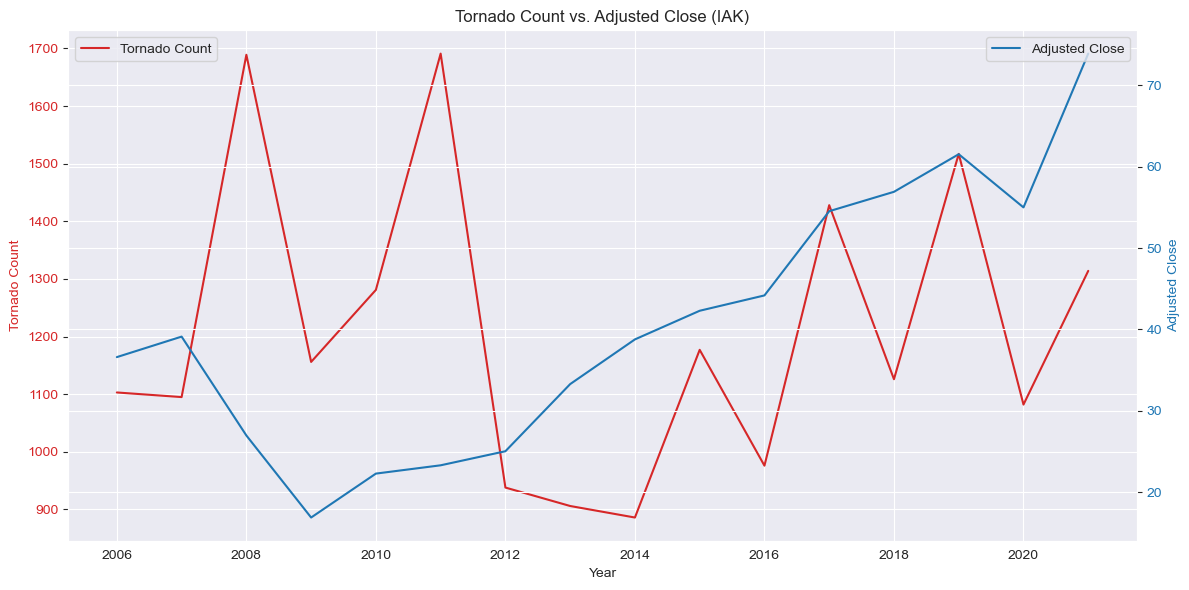

In [59]:
# Line chart with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Tornado Count
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Tornado Count', color=color)
ax1.plot(yearly_data['Year'], yearly_data['Tornado_Count'], color=color, label='Tornado Count')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Plot Adjusted Close on secondary y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Adjusted Close', color=color)
ax2.plot(yearly_data['Year'], yearly_data['Adj Close'], color=color, label='Adjusted Close')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Tornado Count vs. Adjusted Close (IAK)')
plt.tight_layout()
plt.show()

Now the combined graph for day interval

In [60]:
merged_df['Date'] = pd.to_datetime(merged_df['Year'], format='%Y')
filtered_df = merged_df[(merged_df['Date'] >= '2019-01-01')]

In [61]:
daily_data = filtered_df.groupby('Date').agg({
    'Adj Close': 'mean',
    'Tornado_Count': 'sum'  # Use sum for daily Tornado counts
}).reset_index()

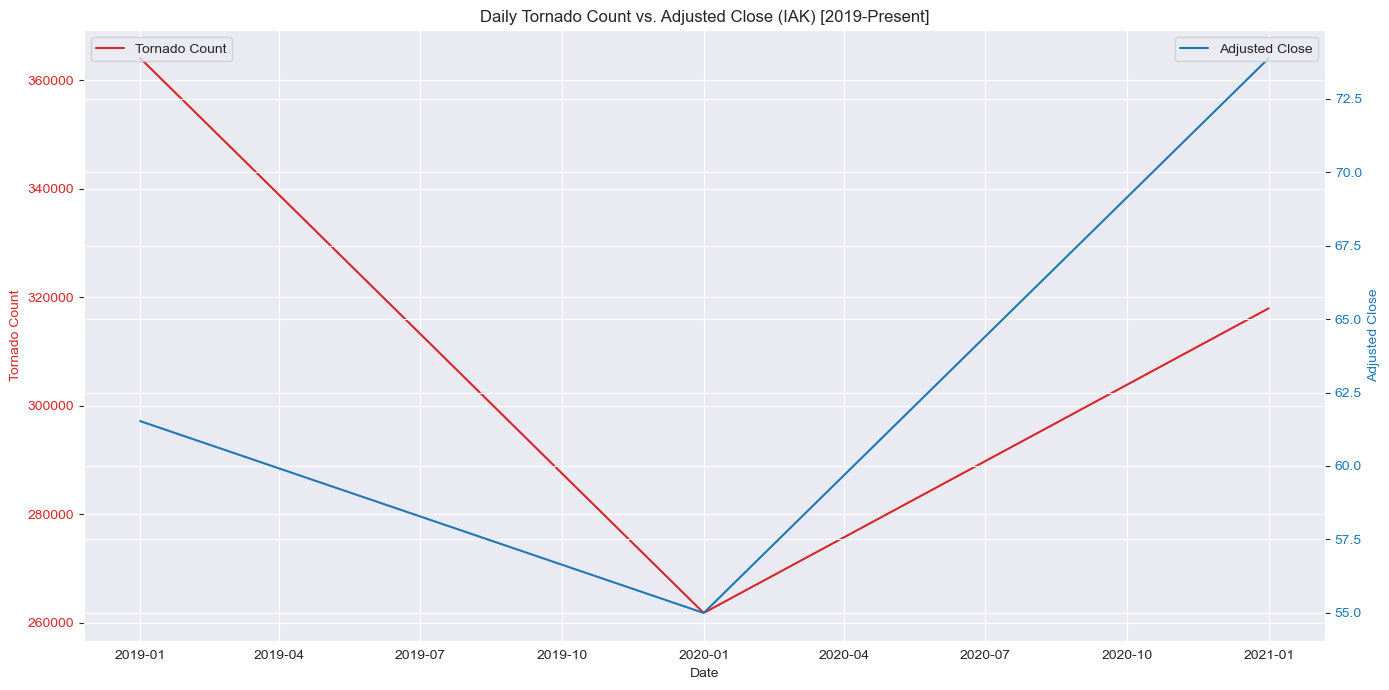

In [62]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Tornado Count
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Tornado Count', color=color)
ax1.plot(daily_data['Date'], daily_data['Tornado_Count'], color=color, label='Tornado Count')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Plot Adjusted Close on secondary y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Adjusted Close', color=color)
ax2.plot(daily_data['Date'], daily_data['Adj Close'], color=color, label='Adjusted Close')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Daily Tornado Count vs. Adjusted Close (IAK) [2019-Present]')
plt.tight_layout()
plt.show()

In [63]:
storm_df = pd.read_csv('data/storms.csv')

In [64]:
storm_df.tail(3)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
19063,19064,Wanda,2021,11,7,12,39.2,-34.9,other low,NaN,35,1006,90.0,0.0
19064,19065,Wanda,2021,11,7,18,40.9,-32.8,other low,NaN,40,1006,90.0,0.0
19065,19066,Wanda,2021,11,8,0,43.2,-29.7,other low,NaN,40,1006,70.0,0.0


In [65]:
print(storm_df['category'].unique())

[nan  1.  3.  2.  4.  5.]


In [66]:
filtered_storm_df = storm_df[storm_df['category'] == '5.0']
print(filtered_storm_df.head())

Empty DataFrame
Columns: [Unnamed: 0, name, year, month, day, hour, lat, long, status, category, wind, pressure, tropicalstorm_force_diameter, hurricane_force_diameter]
Index: []


In [67]:
filtered_storm_df['date'] = pd.to_datetime(
    filtered_storm_df[['year', 'month', 'day']], 
    errors='coerce'  # Handle invalid dates 
)

In [68]:
filtered_storm_df = filtered_storm_df.dropna(subset=['date'])

In [69]:
filtered_storm_df = filtered_storm_df.sort_values(by='date')

In [70]:
storm_counts_by_date = filtered_storm_df.groupby('date').size()

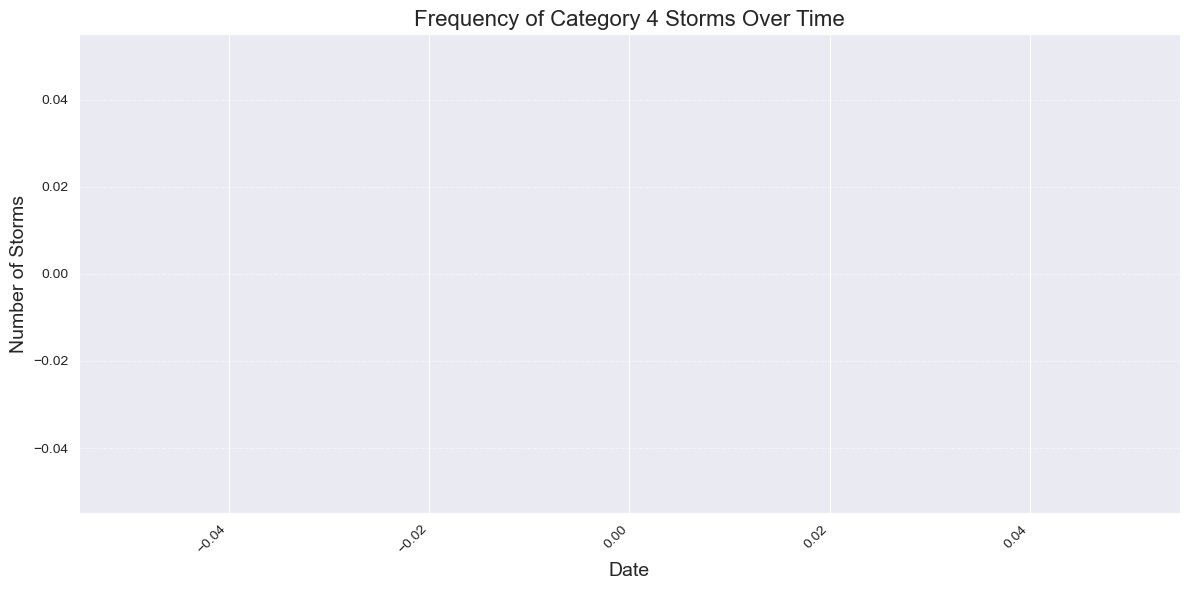

In [71]:
plt.figure(figsize=(12, 6))
storm_counts_by_date.plot(kind='line', marker='o', color='blue', linestyle='-', alpha=0.7)

plt.title("Frequency of Category 4 Storms Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Storms", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

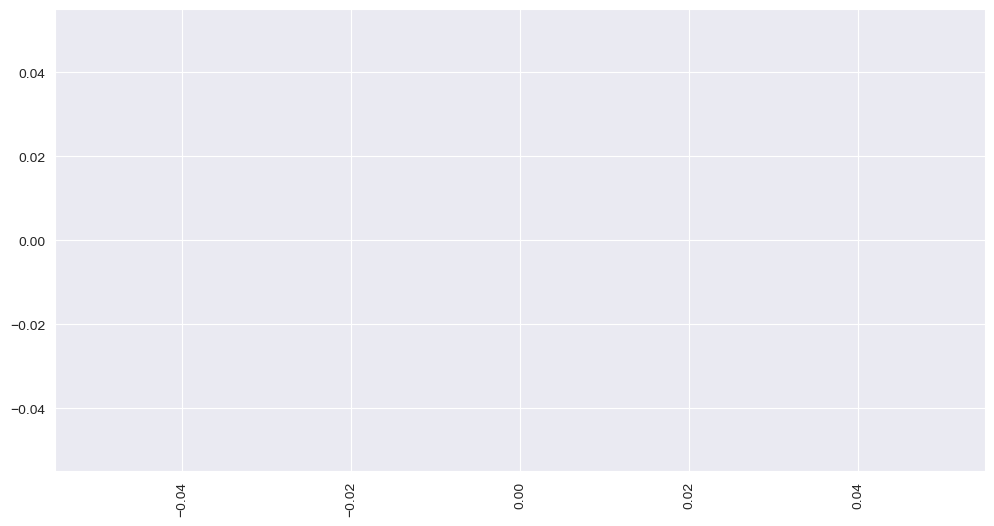

In [72]:
plt.figure(figsize=(12, 6))
storm_counts_by_date.plot(kind='bar', color='skyblue', alpha=0.7)

plt.title("Frequency of Category 4 Storms Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Storms", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

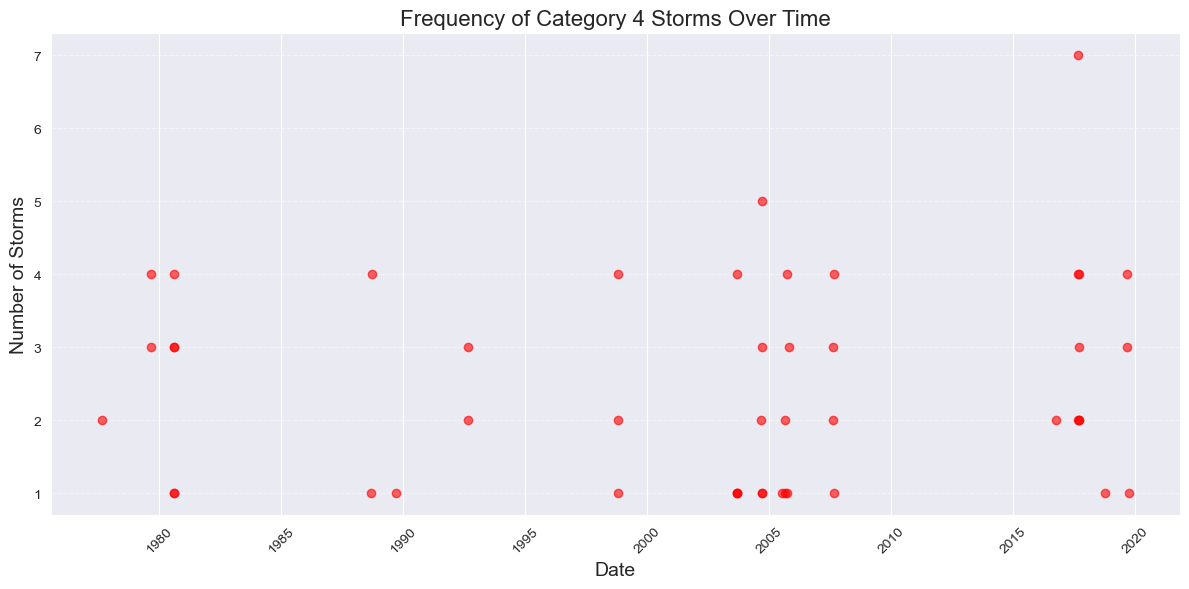

In [104]:
plt.figure(figsize=(12, 6))
plt.scatter(storm_counts_by_date.index, storm_counts_by_date.values, color='red', alpha=0.6)

plt.title("Frequency of Category 4 Storms Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Storms", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


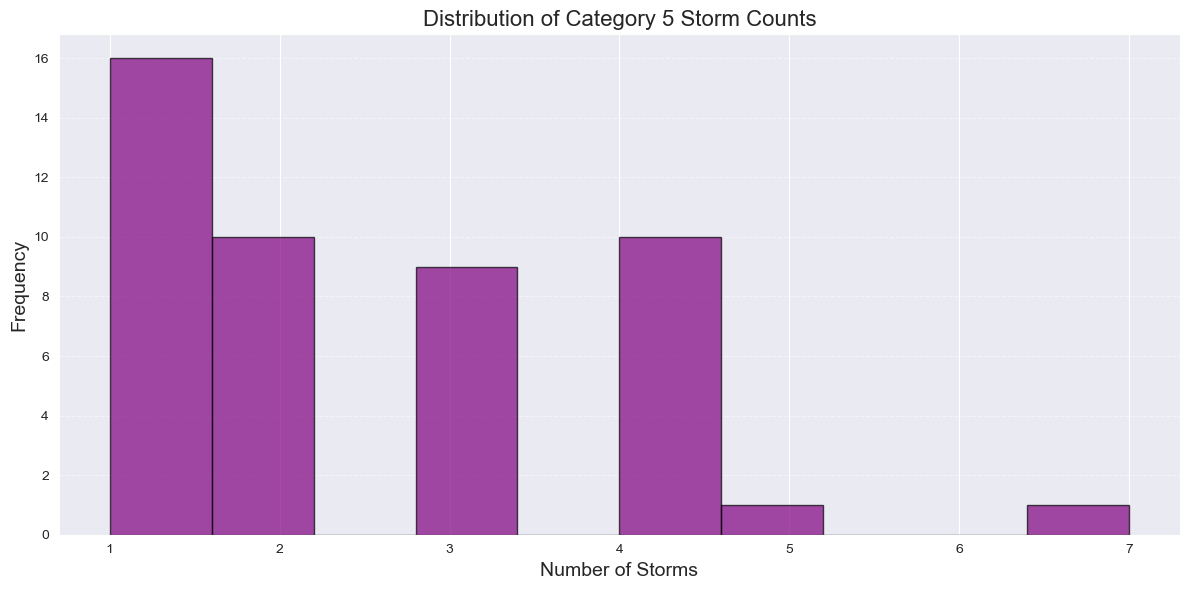

In [106]:
plt.figure(figsize=(12, 6))
plt.hist(storm_counts_by_date.values, bins=10, color='purple', alpha=0.7, edgecolor='black')

plt.title("Distribution of Category 5 Storm Counts", fontsize=16)
plt.xlabel("Number of Storms", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


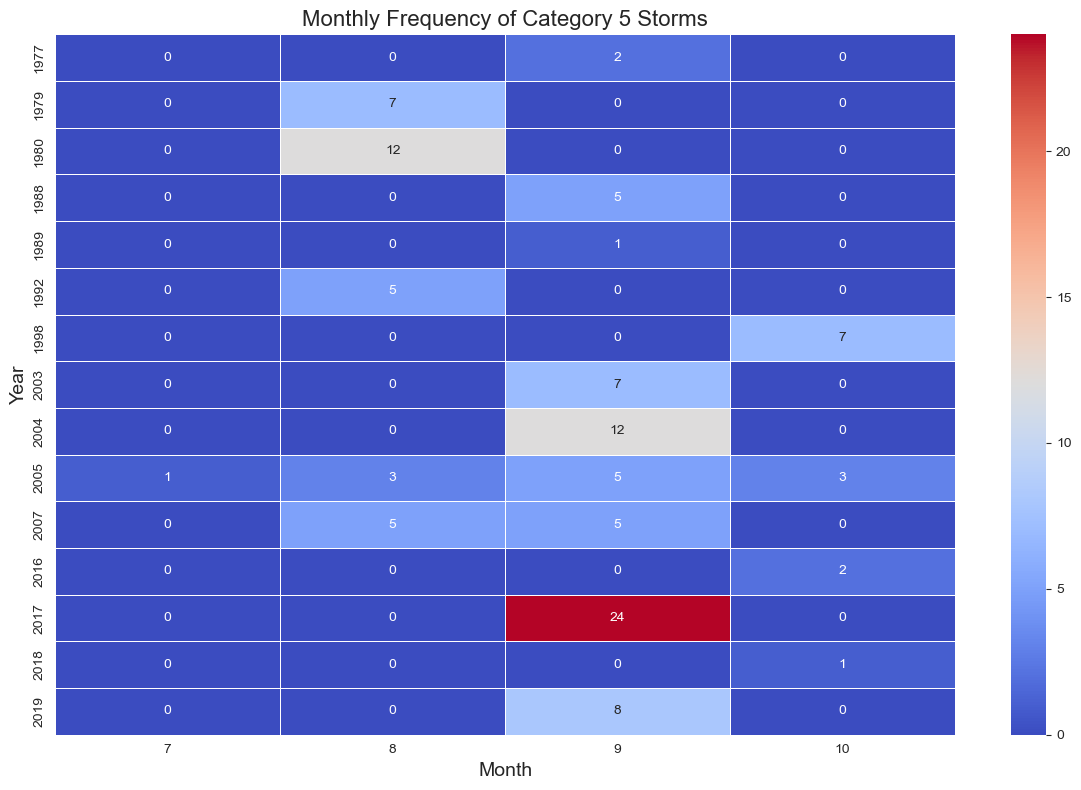

In [108]:
import seaborn as sns

# Create a DataFrame for heatmap with year and month as index/columns
heatmap_data = filtered_storm_df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)

plt.title("Monthly Frequency of Category 5 Storms", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.tight_layout()
plt.show()


In [109]:
heatmap_data = storm_df.groupby(['year', 'category']).size().unstack(fill_value=0)

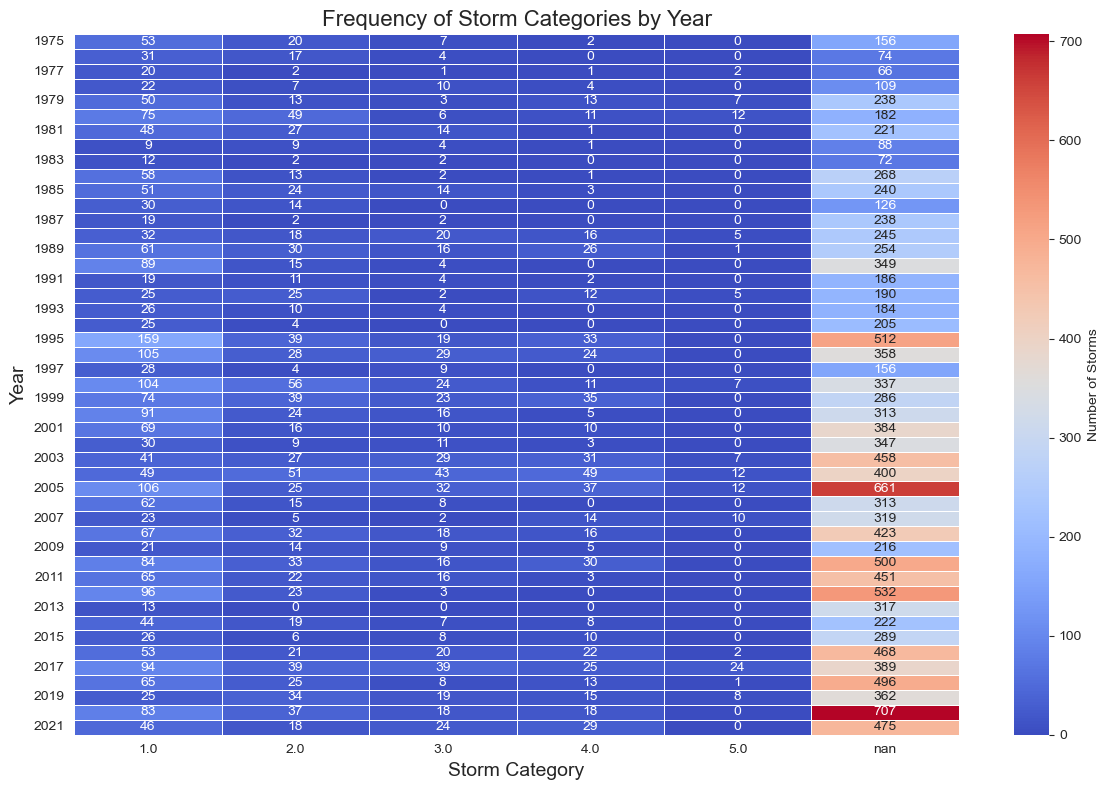

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Number of Storms'})

# Add titles and labels
plt.title("Frequency of Storm Categories by Year", fontsize=16)
plt.xlabel("Storm Category", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.tight_layout()

# Show the heatmap
plt.show()